In [1]:
def subsample_labels(df, labels):
    return df.loc[df['label'].isin(labels)]

def subsample_features(df):
    features = []
    for f in df.columns.tolist():
        if 'e0' in f or 'e2' in f:
            continue
        features.append(f)
    df.drop(features, axis=1, inplace=True)
    return df

In [2]:
import pandas as pd
df = pd.read_csv('results/feature_vector.csv', index_col=0)
df = df[df['group'] != 'none_hearing']
label_names = ['angry','fear','happy', 'neutral', 'sad']
df = subsample_labels(df, label_names)

labels = df['label']
group = df['group']
df.drop(['label', 'group'], axis=1, inplace=True)
# df = subsample_features


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# clf = DecisionTreeClassifier(random_state=0, criterion='entropy')
clf = RandomForestClassifier(criterion='entropy', max_depth=5)
# cv_scores = cross_val_score(clf, df, groups, cv=10)
cv_scores = cross_val_score(clf, df, labels, cv=10)

print(cv_scores)
print(np.mean(cv_scores))

[0.41666667 0.33333333 0.41666667 0.33333333 0.16666667 0.41666667
 0.66666667 0.5        0.41666667 0.58333333]
0.425


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


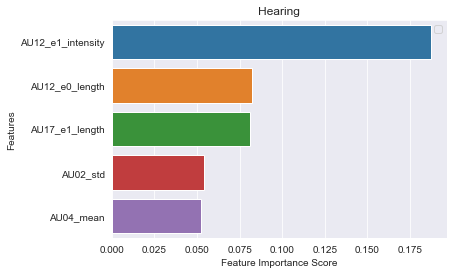

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y = labels #group
clf.fit(df, y)
feature_imp = pd.Series(clf.feature_importances_,index=df.columns.tolist()).sort_values(ascending=False)
feature_imp = feature_imp[0:5]


sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Hearing")
# plt.title("Hearing - Vs. None hearing")
plt.legend()
plt.show()

[Text(0.5, 0.875, 'AU12_e1_intensity <= 1.356\nentropy = 1.985\nsamples = 120\nvalue = [24, 30, 30, 36]\nclass = neutral'),
 Text(0.25, 0.625, 'AU12_e0_intensity <= 0.177\nentropy = 1.825\nsamples = 92\nvalue = [21, 7, 29, 35]\nclass = neutral'),
 Text(0.125, 0.375, 'AU17_e1_length <= 5.5\nentropy = 1.509\nsamples = 50\nvalue = [10, 0, 17, 23]\nclass = neutral'),
 Text(0.0625, 0.125, 'entropy = 1.365\nsamples = 32\nvalue = [8, 0, 5, 19]\nclass = neutral'),
 Text(0.1875, 0.125, 'entropy = 1.224\nsamples = 18\nvalue = [2, 0, 12, 4]\nclass = happy'),
 Text(0.375, 0.375, 'AU10_e0_length <= 10.5\nentropy = 1.97\nsamples = 42\nvalue = [11, 7, 12, 12]\nclass = happy'),
 Text(0.3125, 0.125, 'entropy = 1.871\nsamples = 29\nvalue = [8, 5, 4, 12]\nclass = neutral'),
 Text(0.4375, 0.125, 'entropy = 1.335\nsamples = 13\nvalue = [3, 2, 8, 0]\nclass = happy'),
 Text(0.75, 0.625, 'AU12_e2_length <= 12.0\nentropy = 0.922\nsamples = 28\nvalue = [3, 23, 1, 1]\nclass = fear'),
 Text(0.625, 0.375, 'AU02_e0

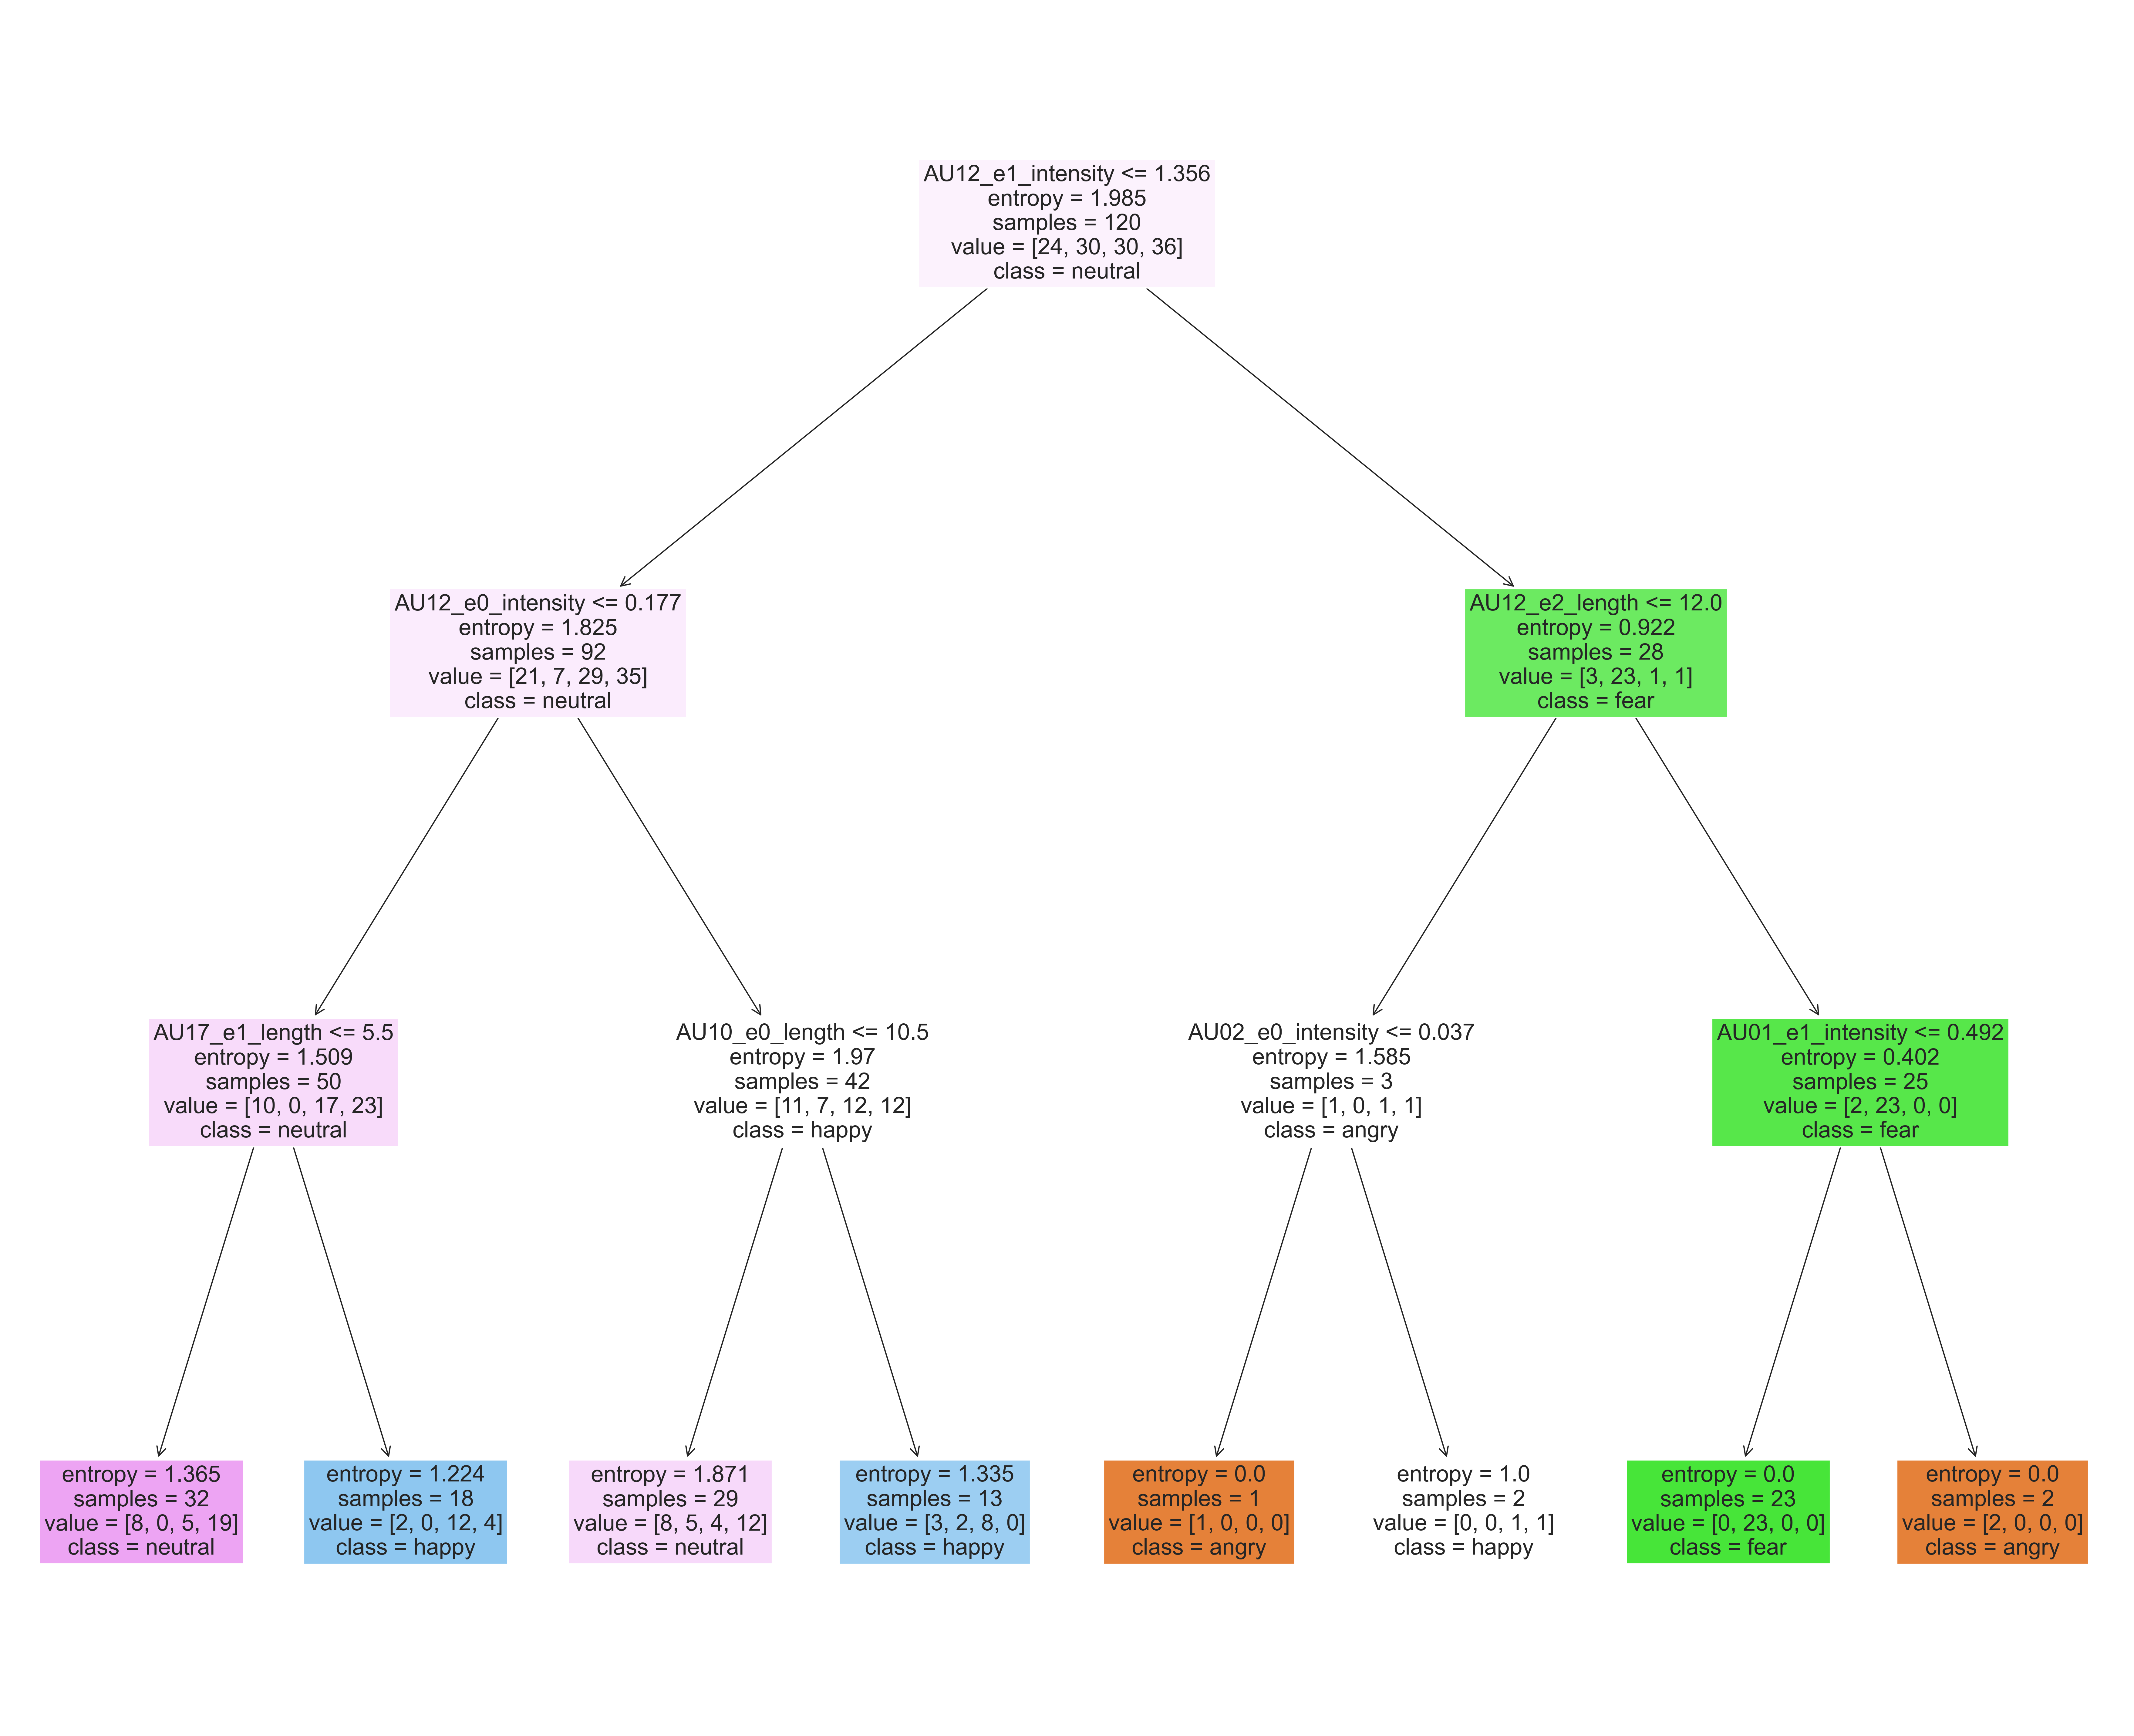

In [18]:
import matplotlib.pyplot as plt
from sklearn import tree
clf.fit(df, y)
# clf = clf.base_estimator_
clf.fit(df, y)


fig = plt.figure(figsize=(30,25), dpi=300)
tree.plot_tree(clf, filled=True, fontsize = 18, feature_names = df.columns.tolist(), class_names=label_names)
# plt.savefig('out.jpeg')
